The [previous notebook](2-Pipeline.ipynb) showed all the steps required to get a Datashader rendering of your dataset, yielding raster images displayed using [Jupyter](http://jupyter.org)'s "rich display" support.  However, these bare images do not show the data ranges or axis labels, making them difficult to interpret.  Moreover, they are only static images, and datasets often need to be explored at multiple scales, which is much easier to do in an interactive program.  

To get axes and interactivity, the images generated by Datashader need to be embedded into a plot using an external library like [Matplotlib](http://matplotlib.org) or [Bokeh](http://bokeh.org). As we illustrate below, the most convenient way to make Datashader plots using these libraries is via the [HoloViews](http://holoviews.org) high-level data-science API. Plotly can also be [used with Datashader](https://plot.ly/python/v3/change-callbacks-datashader/), and native Datashader support for Matplotlib has been [sketched](https://github.com/bokeh/datashader/pull/200) but is not yet released.

In this notebook, we will first look at Datashader's native Bokeh support, because it uses the same API introduced in the previous examples.  We'll start with the same example from the [previous notebook](2-Pipeline.ipynb):

# Embedding Datashader with HoloViews

[HoloViews](http://holoviews.org) (1.7 and later) is a high-level data analysis and visualization library that makes it simple to generate interactive [Datashader](https://github.com/holoviz/datashader)-based plots.  Here's an illustration of how this all fits together when using HoloViews+[Bokeh](http://bokeh.pydata.org):

  ![Datashader+Holoviews+Bokeh](data/ds_hv_bokeh.png)

HoloViews offers a data-centered approach for analysis, where the same tool can be used with small data (anything that fits in a web browser's memory, which can be visualized with Bokeh directly), and large data (which is first sent through Datashader to make it tractable) and with several different plotting frontends.  A developer willing to do more programming can do all the same things separately, using Bokeh, Matplotlib, and Datashader's APIs directly, but with HoloViews it is much simpler to explore and analyze data. Of course, the [previous notebook](1-Pipeline.ipynb) showed that you can also use datashader without either any plotting library at all (the light gray pathways above), but then you wouldn't have interactivity, axes, and so on.

Most of this notebook will focus on HoloViews+Bokeh to support full interactive plots in web browsers, but we will also briefly illustrate the non-interactive HoloViews+Matplotlib approach.  Let's start by importing some parts of HoloViews and setting some defaults:

2021-04-22 14:25:21,043 [13097] WARNING  py.warnings:110: [JupyterRequire] /opt/conda/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
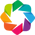

In [1]:
import holoviews as hv
import holoviews.operation.datashader as hd
hd.shade.cmap=["lightblue", "darkblue"]
hv.extension("bokeh", "matplotlib") 

Next we'll start with the same example from the [previous notebook](2_Pipeline.ipynb):

In [2]:
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
from collections import OrderedDict as odict

num=100000
np.random.seed(1)

dists = {cat: pd.DataFrame(odict([('x',np.random.normal(x,s,num)), 
                                  ('y',np.random.normal(y,s,num)), 
                                  ('val',val), 
                                  ('cat',cat)]))      
         for x,  y,  s,  val, cat in 
         [(  2,  2, 0.03, 10, "d1"), 
          (  2, -2, 0.10, 20, "d2"), 
          ( -2, -2, 0.50, 30, "d3"), 
          ( -2,  2, 1.00, 40, "d4"), 
          (  0,  0, 3.00, 50, "d5")] }

df = pd.concat(dists,ignore_index=True)
df["cat"]=df["cat"].astype("category")

### HoloViews+Bokeh

Rather than starting out by specifying a figure or plot, in HoloViews you specify an [``Element``](http://holoviews.org/reference/index.html#elements) object to contain your data, such as `Points` for a collection of 2D x,y points. To start, let's define a Points object wrapping around a small dataframe with 10,000 random samples from the ``df`` above:

In [3]:
points = hv.Points(df.sample(10000))

points

:Points   [x,y]   (val,cat)

As you can see, the ``points`` object visualizes itself as a Bokeh plot, where you can already see many of the [problems that motivate datashader](https://anaconda.org/jbednar/plotting_pitfalls) (overplotting of points, being unable to detect the closely spaced dense collections of points shown in red above, and so on). But this visualization is just the default representation of ``points``, using Jupyter's [rich display](https://anaconda.org/jbednar/rich_display) support; the actual ``points`` object itself is merely a data container:

In [4]:
points.data.head()

x         y  val cat
184289  2.164107 -2.038032   20  d2
8258    1.997346  1.983239   10  d1
186900  2.176841 -2.070830   20  d2
161735  1.981356 -2.084261   20  d2
149948  2.018556 -2.000011   20  d2

### HoloViews+Datashader+Matplotlib

The default visualizations in HoloViews work well for small datasets, but larger ones will have overplotting issues as are already visible above, and will eventually either overwhelm the web browser (for the Bokeh frontend) or take many minutes to plot (for the Matplotlib backend). Luckily, HoloViews provides support for using Datashader to handle both of these problems:

:Layout
   .DynamicMap.I :DynamicMap   []
      :RGB   [x,y]   (R,G,B,A)
   .RGB.I        :RGB   [x,y]   (R,G,B,A)
   .RGB.II       :RGB   [x,y]   (R,G,B,A)
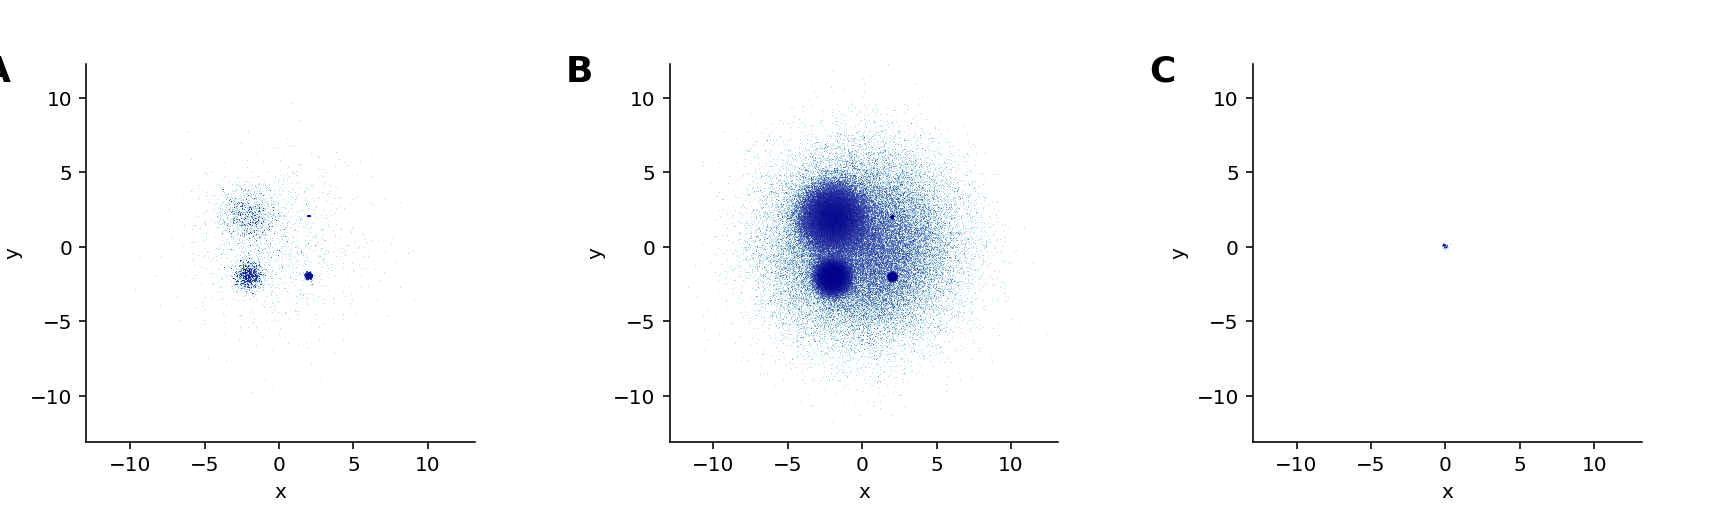

In [5]:
hv.output(backend="matplotlib")
agg = ds.Canvas().points(df,'x','y')
hd.datashade(points)  +  hd.shade(hv.Image(agg))  +  hv.RGB(np.array(tf.shade(agg).to_pil()))

Here we asked HoloViews to plot ``df`` using Datashader+Matplotlib, in three different ways:
- **A**: HoloViews aggregates and shades an image directly from the ``points`` object using its own datashader support, then passes the image to Matplotlib to embed into an appropriate set of axes.
- **B**: HoloViews accepts a pre-computed datashader aggregate, reads out the metadata about the plot ranges that is stored in the aggregate array, and passes it to Matplotlib for colormapping and then embedding.
- **C**: HoloViews accepts a PIL image computed beforehand and passes it to Matplotlib for embedding.  

As you can see, option A is the most convenient; you can simply wrap your HoloViews element with ``datashade`` and the rest will be taken care of.  But if you want to have more control by computing the aggregate or the full RGB image yourself using the API from the [previous notebook](2-Pipeline.ipynb) you are welcome to do so while using HoloViews+Matplotlib (or HoloViews+Bokeh, below) to embed the result into labelled axes.


### HoloViews+Datashader+Bokeh

The Matplotlib interface only produces a static plot, i.e., a PNG or SVG image, but the [Bokeh](http://bokeh.pydata.org) interface of HoloViews adds the dynamic zooming and panning necessary to understand datasets across scales:

In [6]:
hv.output(backend="bokeh")
hd.datashade(points)

:DynamicMap   []
   :RGB   [x,y]   (R,G,B,A)

Here, ``hd.datashade`` is not just a function call; it is an "operation" that dynamically calls Datashader every time a new plot is needed by Bokeh.  The above plot will automatically be interactive when using the Bokeh frontend to HoloViews, and Datashader will be called on each zoom or pan event if you are running a live notebook. ***Note that you'll only see an updated image on zooming in if there is a live Python process running.*** 

Whatever data has been given to the browser can be viewed interactively, but in this case only a single image of the data is given at a time, and so you will not be able to see more detail when zooming in unless the Python (and thus Datashader) process is running. In a static HTML export of this notebook, such as those on a website, you'll only see the original pixels getting larger, not a zoomed-in rendering as in the callback plots above.

If you are running a live process, you can experiment with the interactivity yourself. You can zoom in using a scroll wheel (as long as the "wheel zoom" tool is enabled on the right) or pan by clicking and dragging (as long as the "pan" tool is enabled on the right).  Each time you zoom or pan, the callback will be given the new viewport that's now visible, and datashader will render a new image to update the display. The result makes it look as if all of the data is available in the web browser interactively, while only ever storing a single image at any one time. In this way, full interactivity can be provided even for data that is far too large to display in a web browser directly. (Most web browsers can handle tens of thousands or hundreds of thousands of data points, but not millions or billions!)

### Interactive visualization with `spread`


One advantage when using `HoloViews` operations is that you can chain them to make expressions for complex interactive visualizations.  For instance, here is an interactive version of the plots showing the `spread` transformation shown at the end of the [previous notebook](2_Pipeline.ipynb):

In [7]:
datashaded = hd.datashade(points, aggregator=ds.count_cat('cat')).redim.range(x=(-5,5),y=(-5,5))
hd.dynspread(datashaded, threshold=0.50, how='over').opts(height=500,width=500)

:DynamicMap   []
   :RGB   [x,y]   (R,G,B,A)

You can read more about HoloViews support for Datashader at [holoviews.org](http://holoviews.org/user_guide/Large_Data.html).

### HoloViews+Datashader+Bokeh Legends

Because the underlying plotting library only ever sees an image when using Datashader, providing legends and keys has to be handled separately from any underlying support for those features in the plotting library. We are working to simplify this process, but for now you can show a categorical legend by adding a suitable collection of labeled dummy points:

In [8]:
from datashader.colors import Sets1to3

datashaded  = hd.datashade(points, aggregator=ds.count_cat('cat'), color_key=Sets1to3)
gaussspread = hd.dynspread(datashaded, threshold=0.50, how='over').opts(plot=dict(height=400,width=400))

color_key = [(name,color) for name,color in zip(["d1","d2","d3","d4","d5"], Sets1to3)]
color_points = hv.NdOverlay({n: hv.Points([0,0], label=str(n)).opts(style=dict(color=c)) for n,c in color_key})

color_points * gaussspread

:DynamicMap   []
   :Overlay
      .NdOverlay.D1 :NdOverlay   [Element]
         :Points   [x,y]
      .RGB.I        :RGB   [x,y]   (R,G,B,A)

### HoloViews+Datashader+Bokeh Hover info

As you can see, converting the data to an image using Datashader makes it feasible to work with even very large datasets interactively.  One unfortunate side effect is that the original datapoints and line segments can no longer be used to support "tooltips" or "hover" information directly; that data simply is not present at the browser level, and so the browser cannot unambiguously report information about any specific datapoint. Luckily, you can still provide hover information that reports properties of a subset of the data in a separate layer, you can provide information for a spatial region of the plot rather than for specific datapoints, or you can provide hover per pixel if you let Bokeh do the colormapping for you. As an example of explicitly constructing hover information, here let's calculate the point counts for each small square region:

In [9]:
from holoviews.streams import RangeXY

pts = hd.datashade(points, width=400, height=400)

quadmesh =  hv.QuadMesh(hd.aggregate(points, width=10, height=10, dynamic=False)) \
            .opts(tools=['hover'], alpha=0, hover_alpha=0.2)

dynamic = hv.util.Dynamic(hd.aggregate(points, width=10, height=10, streams=[RangeXY]), 
                          operation=hv.QuadMesh) \
          .opts(tools=['hover'], alpha=0, hover_alpha=0.2)

(pts * quadmesh).relabel("Fixed hover") + (pts * dynamic).relabel("Dynamic hover")

:Layout
   .DynamicMap.Fixed_hover   :DynamicMap   []
      :Overlay
         .RGB.I      :RGB   [x,y]   (R,G,B,A)
         .QuadMesh.I :QuadMesh   [x,y]   (Count)
   .DynamicMap.Dynamic_hover :DynamicMap   []
      :Overlay
         .RGB.I      :RGB   [x,y]   (R,G,B,A)
         .QuadMesh.I :QuadMesh   [x,y]   (Count)

In the above examples, the plot on the left provides hover information at a fixed spatial scale, while the one on the right reports on an area that scales with the zoom level so that arbitrarily small regions of data space can be examined, which is generally more useful.

As you can see, HoloViews makes it just about as simple to work with Datashader-based plots as regular Bokeh plots (at least if you don't need hover or color keys!), letting you visualize data of any size interactively in a browser using just a few lines of code. Because Datashader-based HoloViews plots are just one or two extra steps added on to regular HoloViews plots, they support all of the same features as regular HoloViews objects, and can freely be laid out, overlaid, and nested together with them.  See [holoviews.org](http://holoviews.org) for examples and documentation for how to control the appearance of these plots and how to work with them in general.

## HoloViews+Datashader+Panel

To interactively explore data in a dashboard, you can combine Panel with HoloViews and Datashader to create an interactive visualization that allows you to toggle aggregation methods, edit colormaps, and generally interact with the data through the use of widgets (50 lines of code):

  [![Datashader+Holoviews+Panel](data/dashboard.png)](https://examples.pyviz.org/datashader_dashboard/dashboard.html)